In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
ecar_df = pd.read_csv("./Database/Cheapestelectriccars-EVDatabase.csv")
ecar_df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [3]:
print(ecar_df.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [4]:
#Clean the blank spaces
ecar_df = ecar_df.fillna('0')
#Create a new column
ecar_df.insert(loc=0, column="Manufacturer", value=ecar_df.Name.str.split(' ', n=1, expand=True)[0])
# Remove the first word from the 'Name' column
ecar_df['Name'] = ecar_df.Name.str.split(' ', n=1, expand=True)[1]

In [5]:
ecar_df.dtypes

Manufacturer       object
Name               object
Subtitle           object
Acceleration       object
TopSpeed           object
Range              object
Efficiency         object
FastChargeSpeed    object
Drive              object
NumberofSeats       int64
PriceinGermany     object
PriceinUK          object
dtype: object

In [6]:
ecar_df['Name']

0                          Ampera-e 
1                  Kangoo Maxi ZE 33
2                              Leaf 
3        e-tron Sportback 55 quattro
4                     Taycan Turbo S
                   ...              
175                        Marvel R 
176    Model 3 Long Range Dual Motor
177                MG5 EV Long Range
178             Q4 e-tron 45 quattro
179           Q4 Sportback e-tron 40
Name: Name, Length: 180, dtype: object

In [7]:
ecar_df.head()

,Manufacturer,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel,Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",0
1,Renault,Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,0,"£31,680"
2,Nissan,Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi,e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,0,"£79,900"
4,Porsche,Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [8]:
#Subtitle column
Subtitle=[]
for item in ecar_df['Subtitle']:
    Subtitle.append(float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ','')))
ecar_df['Subtitle']=Subtitle

In [9]:
#Acceleration column
Acceleration=[]
for item in ecar_df['Acceleration']:
    Acceleration.append(float(item.replace(' sec','')))
ecar_df['Acceleration']=Acceleration

In [10]:
#TopSpeed column
TopSpeed=[]
for item in ecar_df['TopSpeed']:
    TopSpeed.append(int(item.replace(' km/h','')))
ecar_df['TopSpeed']=TopSpeed

In [11]:
#Range column
Range=[]
for item in ecar_df['Range']:
    Range.append(int(item.replace(' km','')))
ecar_df['Range']=Range

In [12]:
#Efficiency column
Efficiency=[]
for item in ecar_df['Efficiency']:
    Efficiency.append(int(item.replace(' Wh/km','')))
ecar_df['Efficiency']=Efficiency

In [13]:
#FastChargeSpeed column
FastChargeSpeed=[]
for item in ecar_df['FastChargeSpeed']:
    FastChargeSpeed.append(int(item.replace(' km/h','').replace('-','0')))
ecar_df['FastChargeSpeed']=FastChargeSpeed

In [14]:
#Clean dataframe
#Remove currency signs
PriceinUK=[]
for item in ecar_df['PriceinUK']:
    PriceinUK.append(int(item.replace('£','').replace(',','')))
ecar_df['PriceinUK']=PriceinUK

PriceinGermany=[]
for item in ecar_df['PriceinGermany']:
    PriceinGermany.append(int(item.replace('€','').replace(',','')))
ecar_df['PriceinGermany']=PriceinGermany

In [15]:
ecar_df = ecar_df.rename(columns={'Name':'Model',
                                  'Subtitle':'Subtitle(kWh)',
                                  'Acceleration':'Acceleration(sec)',
                                  'TopSpeed':'TopSpeed (km/h)',
                                  'Range':'Range(km)',
                                  'Efficiency':'Efficiency(Wh/km)',
                                  'FastChargeSpeed':'FastChargeSpeed(km/h)',
                                  'PriceinGermany':'PriceinEuros',
                                  'PriceinUK':'PriceinPounds'
                                 })
ecar_df.head()

,Manufacturer,Model,Subtitle(kWh),Acceleration(sec),TopSpeed (km/h),Range(km),Efficiency(Wh/km),FastChargeSpeed(km/h),Drive,NumberofSeats,PriceinEuros,PriceinPounds
0,Opel,Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0
1,Renault,Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680
2,Nissan,Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi,e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900
4,Porsche,Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830


In [16]:
print(ecar_df.columns.tolist())

['Manufacturer', 'Model', 'Subtitle(kWh)', 'Acceleration(sec)', 'TopSpeed (km/h)', 'Range(km)', 'Efficiency(Wh/km)', 'FastChargeSpeed(km/h)', 'Drive', 'NumberofSeats', 'PriceinEuros', 'PriceinPounds']


In [17]:
ecar_df.nunique()

Manufacturer              37
Model                    174
Subtitle(kWh)             61
Acceleration(sec)         77
TopSpeed (km/h)           35
Range(km)                 68
Efficiency(Wh/km)         80
FastChargeSpeed(km/h)     69
Drive                      3
NumberofSeats              4
PriceinEuros             152
PriceinPounds            124
dtype: int64

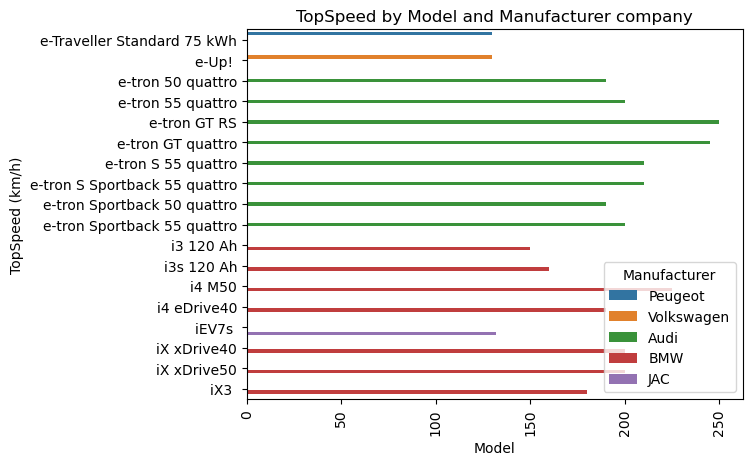

In [18]:
df_sorted = ecar_df.sort_values('Model')
df_top_20 = df_sorted.tail(20)
sns.barplot(data=df_top_20, x='TopSpeed (km/h)', y='Model', hue='Manufacturer')
plt.xlabel('Model')
plt.ylabel('TopSpeed (km/h)')
plt.title('TopSpeed by Model and Manufacturer company')
plt.xticks(rotation='vertical')
plt.show()

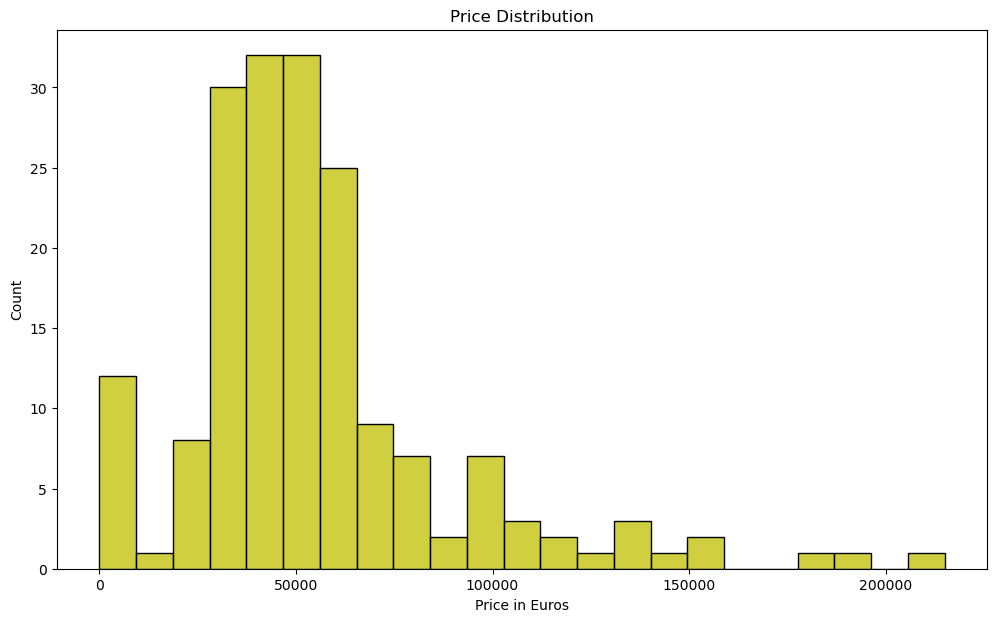

In [19]:
plt.figure(figsize = (12,7))
sns.histplot(data=ecar_df, x="PriceinEuros",color = "y")
plt.xlabel("Price in Euros")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()

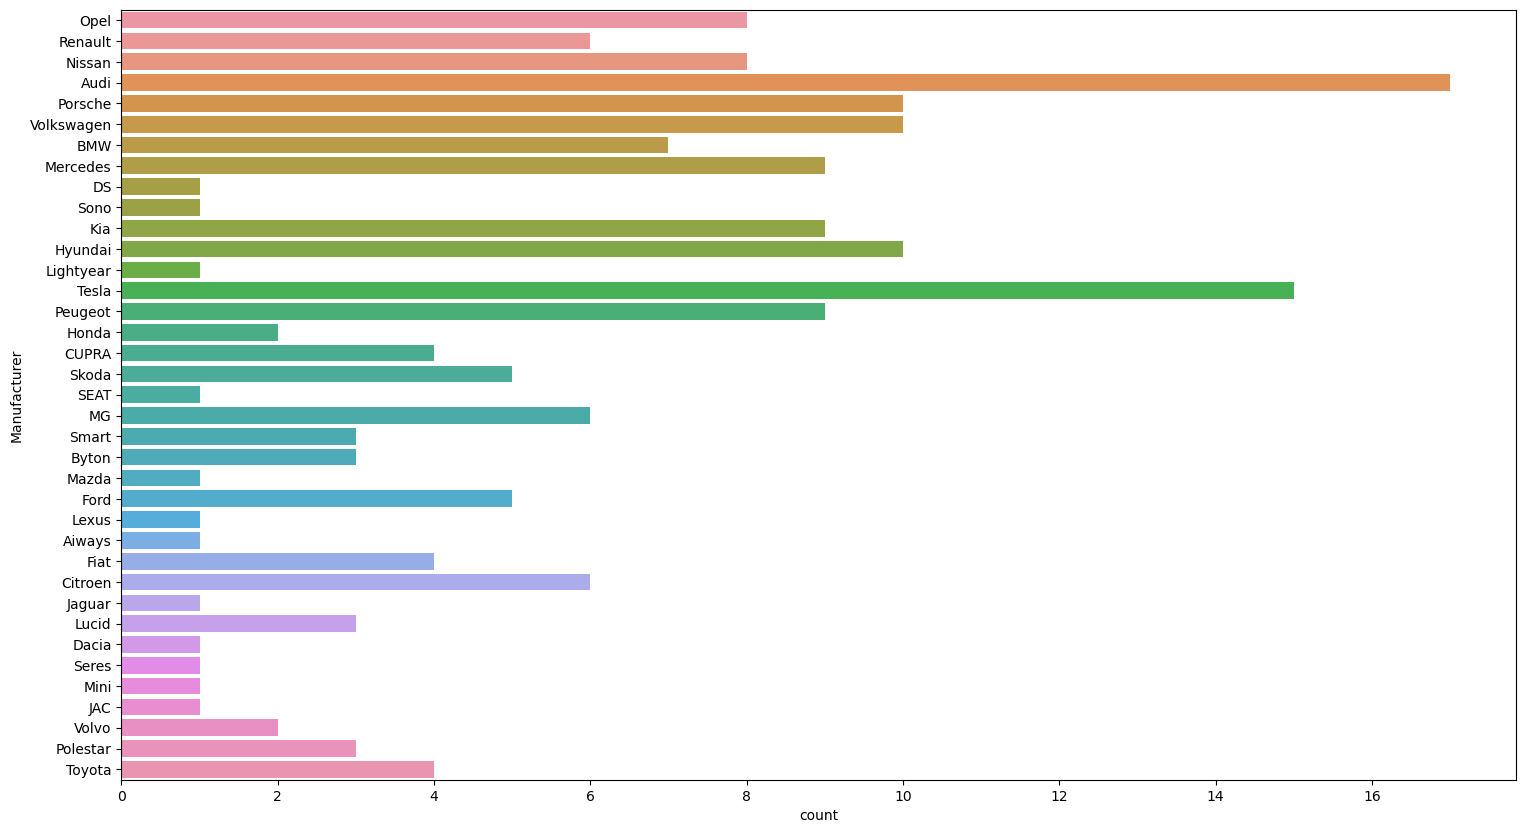

In [20]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = ecar_df)
plt.show()

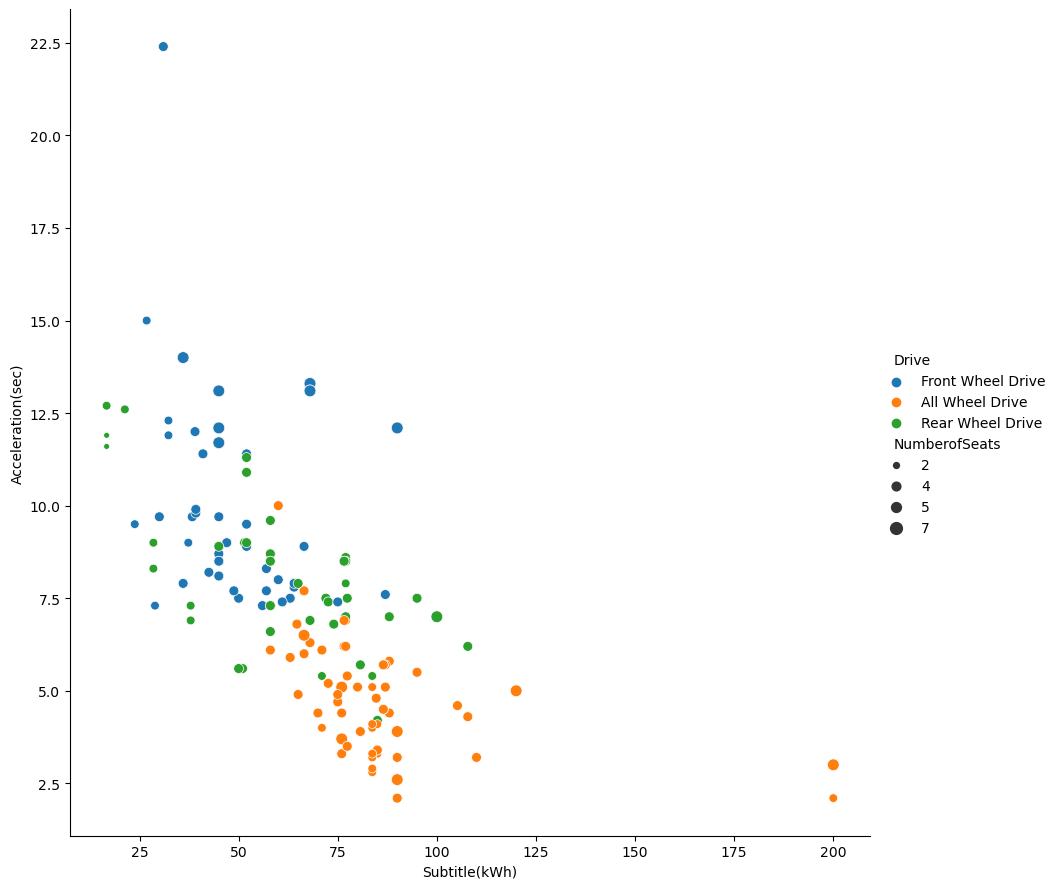

In [21]:
sns.relplot(x="Subtitle(kWh)", y="Acceleration(sec)", height=9,size='NumberofSeats',hue="Drive",data=ecar_df)
plt.show()